# Imports

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [92]:
ranking = pd.read_csv('./datasets/created/rank_copa_america.csv')
ranking.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
223,2024-06-09,Argentina,Ecuador,1,0,Friendly,Chicago,United States,True,1855.20,1855.20,1.0,0.0,1519.20,1519.20,31.0,-1.0
224,2024-06-11,Chile,Paraguay,3,0,Friendly,Santiago,Chile,False,1489.82,1489.82,42.0,2.0,1430.73,1430.73,56.0,3.0
225,2024-06-12,Ecuador,Bolivia,3,1,Friendly,Chester,United States,True,1519.20,1519.20,31.0,-1.0,1284.55,1284.55,86.0,1.0
226,2024-06-15,Colombia,Bolivia,3,0,Friendly,Denver,United States,True,1655.29,1655.29,14.0,0.0,1284.55,1284.55,86.0,1.0
227,2024-06-16,Panama,Paraguay,0,1,Friendly,Panama City,Panama,False,1475.62,1475.62,44.0,3.0,1430.73,1430.73,56.0,3.0


In [93]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = ranking.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [94]:
ranking[["result", "home_team_points", "away_team_points"]] = results
ranking.tail()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,result,home_team_points,away_team_points
223,2024-06-09,Argentina,Ecuador,1,0,Friendly,Chicago,United States,True,1855.20,1855.20,1.0,0.0,1519.20,1519.20,31.0,-1.0,0,3,0
224,2024-06-11,Chile,Paraguay,3,0,Friendly,Santiago,Chile,False,1489.82,1489.82,42.0,2.0,1430.73,1430.73,56.0,3.0,0,3,0
225,2024-06-12,Ecuador,Bolivia,3,1,Friendly,Chester,United States,True,1519.20,1519.20,31.0,-1.0,1284.55,1284.55,86.0,1.0,0,3,0
226,2024-06-15,Colombia,Bolivia,3,0,Friendly,Denver,United States,True,1655.29,1655.29,14.0,0.0,1284.55,1284.55,86.0,1.0,0,3,0
227,2024-06-16,Panama,Paraguay,0,1,Friendly,Panama City,Panama,False,1475.62,1475.62,44.0,3.0,1430.73,1430.73,56.0,3.0,1,0,3


<Axes: >

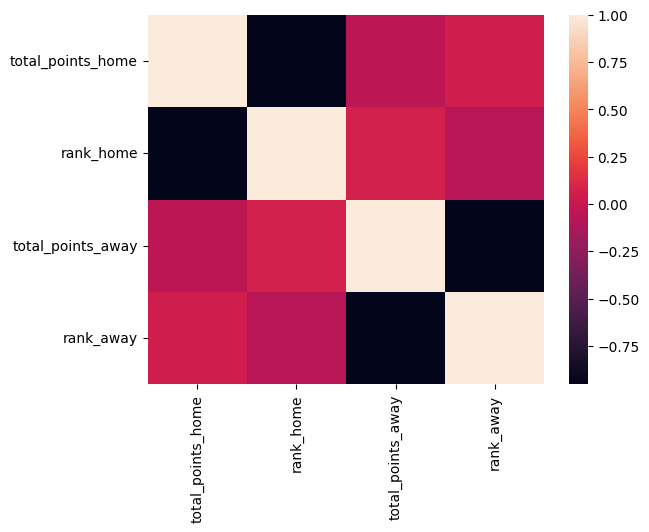

In [95]:
import seaborn as sns

sns.heatmap(ranking[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())

In [96]:
ranking["rank_dif"] = ranking["rank_home"] - ranking["rank_away"]
ranking["sg"] = ranking["home_score"] - ranking["away_score"]
ranking["points_home_by_rank"] = ranking["home_team_points"]/ranking["rank_away"]
ranking["points_away_by_rank"] = ranking["away_team_points"]/ranking["rank_home"]

In [97]:
home_team = ranking[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = ranking[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [98]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [99]:
team_stats = pd.concat([home_team, away_team], axis=0)

In [100]:
team_stats.head()

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points
0,2020-10-08,Paraguay,2,2,40.0,22.0,-1.0,1461.0,2,18.0,0.045455,1
1,2020-10-08,Uruguay,2,1,6.0,17.0,1.0,1645.0,0,-11.0,0.176471,3
2,2020-10-08,Argentina,1,0,9.0,64.0,0.0,1623.0,0,-55.0,0.046875,3
3,2020-10-09,Colombia,3,0,10.0,25.0,0.0,1622.0,0,-15.0,0.120000,3
4,2020-10-09,Brazil,5,0,3.0,75.0,0.0,1712.0,0,-72.0,0.040000,3


In [101]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [102]:
stats_mean = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

In [103]:
stats_df = pd.DataFrame(stats_val, columns=stats_mean)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [104]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [105]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [106]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [107]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)


In [108]:
full_df = pd.concat([ranking, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)


In [109]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [110]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])


In [111]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

In [112]:
base_df_no_fg = base_df.dropna()
base_df_no_fg.head()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
6,2020-10-13,Costa Rica,Panama,46.0,81.0,0,1,1,-35.0,0.0,...,0.0,0.0,0.000,0.000,3.0,3.0,0.065217,0.065217,False,True
7,2020-10-13,Bolivia,Argentina,75.0,9.0,1,2,1,66.0,0.0,...,0.0,0.0,0.000,0.000,3.0,3.0,0.046875,0.046875,True,False
8,2020-10-13,Ecuador,Uruguay,64.0,6.0,4,2,0,58.0,1.0,...,0.0,0.0,0.000,0.000,3.0,3.0,0.176471,0.176471,True,False
9,2020-10-13,Venezuela,Paraguay,25.0,40.0,0,1,1,-15.0,0.0,...,0.0,0.0,0.000,0.000,1.0,1.0,0.045455,0.045455,True,False
10,2020-10-13,Peru,Brazil,22.0,3.0,2,4,1,19.0,1.0,...,1.0,1.0,0.025,0.025,3.0,3.0,0.040000,0.040000,True,False


In [113]:
import os

folder_name = "created"
datasets_folder = "./datasets"

new_folder_path = os.path.join(datasets_folder, folder_name)
os.makedirs(new_folder_path, exist_ok=True)

base_df_no_fg.to_csv('./datasets/created/full_db.csv',index=False)

In [114]:
df = base_df_no_fg.copy()


In [115]:
df['total_games_away'] = df.apply(lambda x: len(df[(df.home_team == x["away_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["away_team"]) & (df.date < x["date"])]), axis=1)


In [116]:
df['total_games_home'] = df.apply(lambda x: len(df[(df.home_team == x["home_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["home_team"]) & (df.date < x["date"])]), axis=1)


In [117]:
df = df[df.rank_home != df.rank_away]


In [118]:
df['home_weight_goals'] = df.apply(lambda x: (x["home_goals_mean"]*x["rank_dif"]), axis =1)


In [119]:
df['away_weight_goals_suf'] = df.apply(lambda x: (x["away_goals_suf_mean"]*x["rank_dif"]), axis =1)


In [120]:
df['home_weight_goals_l5'] = df.apply(lambda x: (x["home_goals_mean_l5"]*x["rank_dif"]), axis =1)


In [121]:
df['away_weight_goals_suf_l5'] = df.apply(lambda x: (x["away_goals_suf_mean_l5"]*x["rank_dif"]), axis =1)


In [122]:
df['home_weight_points'] = df.apply(lambda x: (x["home_game_points_mean"]*x["rank_dif"]), axis =1)


In [123]:
df['away_weight_points'] = df.apply(lambda x: (x["away_game_points_mean"]*x["rank_dif"]), axis =1)


In [124]:
df['away_weight_goals'] = df.apply(lambda x: (x["away_goals_mean"]*x["rank_dif"]), axis =1)
df['home_weight_goals_suf'] = df.apply(lambda x: (x["home_goals_suf_mean"]*x["rank_dif"]), axis =1)

In [125]:
df['away_weight_goals_l5'] = df.apply(lambda x: (x["away_goals_mean_l5"]*x["rank_dif"]), axis =1)
df['home_weight_goals_suf_l5'] = df.apply(lambda x: (x["home_goals_suf_mean_l5"]*x["rank_dif"]), axis =1)

In [126]:
import os

folder_name = "created"
datasets_folder = "./datasets"

new_folder_path = os.path.join(datasets_folder, folder_name)
os.makedirs(new_folder_path, exist_ok=True)
df = df.drop(columns=["date", "home_team", "away_team"])


df.to_csv("./datasets/created/new_model.csv", index=False)


In [127]:
df_model = df[(df.total_games_home > 5) & (df.total_games_away > 5)]


In [128]:
df_model.corr()

,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,...,home_weight_goals,away_weight_goals_suf,home_weight_goals_l5,away_weight_goals_suf_l5,home_weight_points,away_weight_points,away_weight_goals,home_weight_goals_suf,away_weight_goals_l5,home_weight_goals_suf_l5
rank_home,1.000000,-0.092984,-0.151385,0.191884,0.112790,0.741733,0.077612,-0.108336,-0.539303,-0.470460,...,0.719987,0.630337,0.637445,0.599780,0.643295,0.716287,0.701972,0.739017,0.647543,0.725554
rank_away,-0.092984,1.000000,0.432456,-0.252588,-0.332267,-0.736759,-0.018248,0.071568,-0.070234,-0.022364,...,-0.686015,-0.748098,-0.640331,-0.723613,-0.687222,-0.625571,-0.710877,-0.616507,-0.659834,-0.566120
home_score,-0.151385,0.432456,1.000000,-0.105481,-0.547651,-0.394113,-0.032424,0.124459,0.155293,0.150546,...,-0.393227,-0.408895,-0.368413,-0.389545,-0.424912,-0.310501,-0.363806,-0.280172,-0.371580,-0.274929
away_score,0.191884,-0.252588,-0.105481,1.000000,0.302739,0.300455,0.180848,-0.126475,-0.194445,-0.037461,...,0.293358,0.237768,0.273466,0.232047,0.268148,0.334665,0.318367,0.284102,0.317152,0.228634
result,0.112790,-0.332267,-0.547651,0.302739,1.000000,0.300415,0.015711,-0.099939,-0.103365,-0.063931,...,0.300350,0.312775,0.263361,0.325020,0.312546,0.258899,0.287025,0.216720,0.284574,0.206426
rank_dif,0.741733,-0.736759,-0.394113,0.300455,0.300415,1.000000,0.064998,-0.121780,-0.318928,-0.304424,...,0.951050,0.931989,0.864223,0.894745,0.899782,0.907821,0.955564,0.917152,0.884218,0.874068
rank_change_home,0.077612,-0.018248,-0.032424,0.180848,0.015711,0.064998,1.000000,-0.119680,-0.199842,-0.214793,...,0.075214,0.035306,0.102006,0.020199,0.082990,0.097015,0.082302,0.035211,0.071536,0.058008
rank_change_away,-0.108336,0.071568,0.124459,-0.126475,-0.099939,-0.121780,-0.119680,1.000000,0.034554,0.076588,...,-0.092751,-0.084478,-0.070278,-0.096271,-0.105952,-0.111997,-0.091379,-0.100306,-0.094269,-0.111276
home_goals_mean,-0.539303,-0.070234,0.155293,-0.194445,-0.103365,-0.318928,-0.199842,0.034554,1.000000,0.681511,...,-0.406634,-0.284290,-0.412530,-0.270672,-0.417273,-0.303773,-0.316213,-0.204731,-0.243096,-0.223256
home_goals_mean_l5,-0.470460,-0.022364,0.150546,-0.037461,-0.063931,-0.304424,-0.214793,0.076588,0.681511,1.000000,...,-0.393790,-0.268592,-0.472653,-0.259860,-0.396681,-0.298981,-0.297321,-0.203870,-0.215309,-0.205187


In [129]:
df_model.corr()

,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,...,home_weight_goals,away_weight_goals_suf,home_weight_goals_l5,away_weight_goals_suf_l5,home_weight_points,away_weight_points,away_weight_goals,home_weight_goals_suf,away_weight_goals_l5,home_weight_goals_suf_l5
rank_home,1.000000,-0.092984,-0.151385,0.191884,0.112790,0.741733,0.077612,-0.108336,-0.539303,-0.470460,...,0.719987,0.630337,0.637445,0.599780,0.643295,0.716287,0.701972,0.739017,0.647543,0.725554
rank_away,-0.092984,1.000000,0.432456,-0.252588,-0.332267,-0.736759,-0.018248,0.071568,-0.070234,-0.022364,...,-0.686015,-0.748098,-0.640331,-0.723613,-0.687222,-0.625571,-0.710877,-0.616507,-0.659834,-0.566120
home_score,-0.151385,0.432456,1.000000,-0.105481,-0.547651,-0.394113,-0.032424,0.124459,0.155293,0.150546,...,-0.393227,-0.408895,-0.368413,-0.389545,-0.424912,-0.310501,-0.363806,-0.280172,-0.371580,-0.274929
away_score,0.191884,-0.252588,-0.105481,1.000000,0.302739,0.300455,0.180848,-0.126475,-0.194445,-0.037461,...,0.293358,0.237768,0.273466,0.232047,0.268148,0.334665,0.318367,0.284102,0.317152,0.228634
result,0.112790,-0.332267,-0.547651,0.302739,1.000000,0.300415,0.015711,-0.099939,-0.103365,-0.063931,...,0.300350,0.312775,0.263361,0.325020,0.312546,0.258899,0.287025,0.216720,0.284574,0.206426
rank_dif,0.741733,-0.736759,-0.394113,0.300455,0.300415,1.000000,0.064998,-0.121780,-0.318928,-0.304424,...,0.951050,0.931989,0.864223,0.894745,0.899782,0.907821,0.955564,0.917152,0.884218,0.874068
rank_change_home,0.077612,-0.018248,-0.032424,0.180848,0.015711,0.064998,1.000000,-0.119680,-0.199842,-0.214793,...,0.075214,0.035306,0.102006,0.020199,0.082990,0.097015,0.082302,0.035211,0.071536,0.058008
rank_change_away,-0.108336,0.071568,0.124459,-0.126475,-0.099939,-0.121780,-0.119680,1.000000,0.034554,0.076588,...,-0.092751,-0.084478,-0.070278,-0.096271,-0.105952,-0.111997,-0.091379,-0.100306,-0.094269,-0.111276
home_goals_mean,-0.539303,-0.070234,0.155293,-0.194445,-0.103365,-0.318928,-0.199842,0.034554,1.000000,0.681511,...,-0.406634,-0.284290,-0.412530,-0.270672,-0.417273,-0.303773,-0.316213,-0.204731,-0.243096,-0.223256
home_goals_mean_l5,-0.470460,-0.022364,0.150546,-0.037461,-0.063931,-0.304424,-0.214793,0.076588,0.681511,1.000000,...,-0.393790,-0.268592,-0.472653,-0.259860,-0.396681,-0.298981,-0.297321,-0.203870,-0.215309,-0.205187
